In [1]:
import pandas as pd 
from utils import get_imdb_dataset

pd.set_option('max_colwidth', 500) # Set display column width to show more content

In [2]:
# Load dataset, download if necessary 
train, test = get_imdb_dataset()

data already available, skip downloading.
imdb loaded successfully.


In [3]:
# get a sample (head) of the data frame
train.sample(5)

,text,sentiment
9600,"I found this film the first time when I was searching for some works in witch Stéphane Rideau had participate, still in an extraordinary ravishment caused by the astonishingly beautiful «Les roseaux sauvages» (in Portuguese, Juncos Silvestres), by André Téchiné. I was searching for similar movies, in the come of age line. I found then «Presque Rien», a movie where the director Sébastien Lifshitz deliciously amazes us, earning a nomination by the Cannes festival in 2000. The story is about tw...",pos
4682,"There are very few movies that are so funny as this one. I was lucky enough to watch this movie at a theater ""reserved"" for movie buffs like me, so it was not so embarrassing sitting there laughing till my jaw was completely sore and my shirt sleeves were all wet from drying my eyes...<br /><br />At times the story was a bit ""slow"", but that is perhaps for the best - a bit of rest in-between the rolling amongst the aisles (I nearly fell out of the seat...) was most welcome.",pos
13216,"The premise of this awaited sequel was really good and after the huge success of the remake I expected a lot sincerely.<br /><br />The sad truth is that this movie is really absurd and inept. The situations are dumb and beyond reason and the acting is truly awful.<br /><br />This time there aren't likable characters or violins unlike the remake. Also, the gore is not that abundant and when it happens it's truly bad.<br /><br />The violence is minimal and it's a shame because there are many a...",neg
6312,"""It's all up to you, Ed?"" ""Now you get to play the game."" The day my father left my mother, he took me to see this film with his new girlfriend, on opening day at the Cinerama Dome in Hollywood. I was but fourteen years old. I wasn't even entirely sure what I was seeing, but I will never forgot it, especially the scene with Ned Beatty.<br /><br />Watching it today, thirty-six years later, it still gives me quivers.<br /><br />My father was a huge Burt Reynolds fan, hence the reason for stand...",pos
5172,"These type of movies about young teenagers struggling with their own sexuality were something unique and daring and daring a couple of years ago but more and more movies like this got made over the past few years, making it hard for the movies to still stand out really.<br /><br />Also this movie received little publicity, aside from the usual little film festivals that featured this little French movie, as well as the big festivals that are always fond of these type of little movies about e...",pos


In [4]:
print('train shape', train.shape)
print('test shape', test.shape)

train shape (25000, 2)
test shape (25000, 2)


In [5]:
# Statics on tags 
train['sentiment'].value_counts()

pos    12500
neg    12500
Name: sentiment, dtype: int64

# Preprocessing 
## Tokenization and Normalization 
For preprocessing, we will aplly the following steps:

1. Remove HTML tag (`<br />` in this case) from the review text
2. Remove punctuations (replace with whitespace)
3. Split review text into tokens
4. Remove tokens that are considered as "stopwords"
5. For the rest, do lemmatization. 

In [6]:
import nltk
import string 

In [19]:
transtbl = str.maketrans(string.punctuation, ' '*len(string.punctuation))
stopwords = nltk.corpus.stopwords.words('english')
lemmatizer = nltk.WordNetLemmatizer()

In [20]:
stopwords[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [21]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [22]:
'ababc'.translate(str.maketrans('abc','def'))

'dedef'

In [25]:
def preprocessing(line: str) -> str:
    """
    Take a text input and return the preprocessed string.
    i.e.: preprocessed tokens concatenated by whitespace
    """
    line = line.replace('<br />','').translate(transtbl)
    
    # List 
    tokens = [lemmatizer.lemmatize(t.lower(),'v')
              for t in nltk.word_tokenize(line)
              if t.lower() not in stopwords]
    return ' '.join(tokens)

In [26]:
test_str = "I bought several books yesterday<br /> and I really love them!"
preprocessing(test_str)

'buy several book yesterday really love'

In [27]:
from tqdm._tqdm_notebook import tqdm_notebook

In [28]:
tqdm_notebook.pandas()

In [30]:
for df in train, test:
    df['text_prep'] = df['text'].progress_apply(preprocessing)

In [31]:
train.head()

,text,sentiment,text_prep
0,"For a movie that gets no respect there sure are a lot of memorable quotes listed for this gem. Imagine a movie where Joe Piscopo is actually funny! Maureen Stapleton is a scene stealer. The Moroni character is an absolute scream. Watch for Alan ""The Skipper"" Hale jr. as a police Sgt.",pos,movie get respect sure lot memorable quote list gem imagine movie joe piscopo actually funny maureen stapleton scene stealer moroni character absolute scream watch alan skipper hale jr police sgt
1,"Bizarre horror movie filled with famous faces but stolen by Cristina Raines (later of TV's ""Flamingo Road"") as a pretty but somewhat unstable model with a gummy smile who is slated to pay for her attempted suicides by guarding the Gateway to Hell! The scenes with Raines modeling are very well captured, the mood music is perfect, Deborah Raffin is charming as Cristina's pal, but when Raines moves into a creepy Brooklyn Heights brownstone (inhabited by a blind priest on the top floor), things ...",pos,bizarre horror movie fill famous face steal cristina rain later tv flamingo road pretty somewhat unstable model gummy smile slat pay attempt suicides guard gateway hell scenes rain model well capture mood music perfect deborah raffin charm cristina pal rain move creepy brooklyn heights brownstone inhabit blind priest top floor things really start cook neighbor include fantastically wicked burgess meredith kinky couple sylvia miles beverly angelo diabolical lot eli wallach great fun wily poli...
2,"A solid, if unremarkable film. Matthau, as Einstein, was wonderful. My favorite part, and the only thing that would make me go out of my way to see this again, was the wonderful scene with the physicists playing badmitton, I loved the sweaters and the conversation while they waited for Robbins to retrieve the birdie.",pos,solid unremarkable film matthau einstein wonderful favorite part thing would make go way see wonderful scene physicists play badmitton love sweaters conversation wait robbins retrieve birdie
3,"It's a strange feeling to sit alone in a theater occupied by parents and their rollicking kids. I felt like instead of a movie ticket, I should have been given a NAMBLA membership.<br /><br />Based upon Thomas Rockwell's respected Book, How To Eat Fried Worms starts like any children's story: moving to a new town. The new kid, fifth grader Billy Forrester was once popular, but has to start anew. Making friends is never easy, especially when the only prospect is Poindexter Adam. Or Erica, who...",pos,strange feel sit alone theater occupy parent rollick kid felt like instead movie ticket give nambla membership base upon thomas rockwell respect book eat fry worm start like children story move new town new kid fifth grader billy forrester popular start anew make friends never easy especially prospect poindexter adam erica 4 1 2 feet giant complicate things joe bully freckle face sleeveless shirt daunt antagonize kid death ring crackerjack ring rumor kill punch immediately death ring unleash...
4,"You probably all already know this by now, but 5 additional episodes never aired can be viewed on ABC.com I've watched a lot of television over the years and this is possibly my favorite show, ever. It's a crime that this beautifully written and acted show was canceled. The actors that played Laura, Whit, Carlos, Mae, Damian, Anya and omg, Steven Caseman - are all incredible and so natural in those roles. Even the kids are great. Wonderful show. So sad that it's gone. Of course I wonder abou...",pos,probably already know 5 additional episodes never air view abc com watch lot television years possibly favorite show ever crime beautifully write act show cancel actors play laura whit carlos mae damian anya omg steven caseman incredible natural roles even kid great wonderful show sad go course wonder reason cancel way let believe ms moynahan pregnancy anything perfect time slot market watch episodes abc com hope come dvd day thank rea

In [32]:
assert train.shape == (25000,3)
assert test.shape == (25000,3)

In [33]:
train.sample(2)

,text,sentiment,text_prep
1049,"The first step to getting off of that road that leads to nowhere is recognizing that you're on it in the first place; then it becomes a matter of being assertive and taking positive steps to overcome the negative influences in your life that may have put you on that road to begin with. Which is exactly what a young Latino girl does in `Girlfight,' written and directed by Karyn Kusama. Diana (Michelle Rodriguez) is an eighteen-year-old High School senior from the projects in Brooklyn, facing ...",pos,first step get road lead nowhere recognize first place become matter assertive take positive step overcome negative influence life may put road begin exactly young latino girl girlfight write direct karyn kusama diana michelle rodriguez eighteen year old high school senior project brooklyn face expulsion fourth fight halls since begin semester affect whatever attitude mask deep seat anger threaten take place rather go live father sandro paul calderon tentative relationship younger brother ti...
15997,"The pakage implies that Warren Beatty and Goldie Hawn are pulling off a huge bank robbery, but that's not what I got out of it! I didn't get anything! In the first half there's a new character (without introduction) in every other scene. The first half-hour is completely incomprehensible, the rest is just one long, annoying, underlit chase scene. There's always an irritating sound in the background whether it's a loud watch ticking, a blaring siren, a train whistling, or even the horrible sc...",neg,pakage imply warren beatty goldie hawn pull huge bank robbery get get anything first half new character without introduction every scene first half hour completely incomprehensible rest one long annoy underlit chase scene always irritate sound background whether loud watch tick blare siren train whistle even horrible score quincy jones lot part laughably bad like bad guy chase beatty thin ice car police arrive scene roughly fifteen time really hat movie


## Build Vocabulary
Instead of using `CountVectorizer` (N-gram) provided by sklearn directly, we will build the vocabulary on our own, so that we have more control over it. 

<span style="color:red">**Tips:**</span>

We can only use words in training data for building vocabulary. 

In [34]:
all_words = [w for text in tqdm_notebook(train['text_prep'])
            for w in text.split()]

In [35]:
# Use FreqDist to get count for each word
voca = nltk.FreqDist(all_words)
print(voca)

<FreqDist with 65081 samples and 3022531 outcomes>


In [36]:
voca.most_common(10)

[('film', 48170),
 ('movie', 43912),
 ('one', 26747),
 ('make', 23538),
 ('like', 22335),
 ('see', 20773),
 ('get', 18108),
 ('time', 16143),
 ('good', 15124),
 ('character', 14153)]

In [37]:
topwords = [word for word, _ in voca.most_common(10000)]

## Vectorizer
For this section, we will try two ways to vectorization: **BoW** (1-gram) and **BoW with Tfidf Transformer**.

In [38]:
from sklearn.feature_extraction.text import (
    CountVectorizer,
    TfidfTransformer,
    TfidfVectorizer,)

In [39]:
CountVectorizer()

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

### Tf-idf Transformer

In [43]:
transformer = TfidfTransformer(smooth_idf= False )
transformer

TfidfTransformer(norm='l2', smooth_idf=False, sublinear_tf=False,
         use_idf=True)

In [44]:
counts = [[3,0,1],
          [2,0,0],
          [3,0,0],
          [4,0,0],
          [3,2,0],
          [3,0,2]]
tfidf = transformer.fit_transform(counts)
tfidf

<6x3 sparse matrix of type '<class 'numpy.float64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [45]:
tfidf.toarray()

array([[0.81940995, 0.        , 0.57320793],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.47330339, 0.88089948, 0.        ],
       [0.58149261, 0.        , 0.81355169]])

In [46]:
TfidfVectorizer()

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

Let's take the sentences from the slide as an exmample:

In [47]:
t_corpus = ['the boy love the toy', 'the boy hate the toy']

In [48]:
# Bag of words
# Voc = ['boy', 'hate', 'love', 'the', 'toy']
t_cnt_vec = CountVectorizer()
t_cnt_vec.fit(' '.join(t_corpus).split())
t_cnt_vec.transform(t_corpus).toarray()

array([[1, 0, 1, 2, 1],
       [1, 1, 0, 2, 1]])

In [49]:
t_cnt_vec = TfidfVectorizer()
t_cnt_vec.fit(' '.join(t_corpus).split())
t_cnt_vec.transform(t_corpus).toarray()

array([[0.41508858, 0.        , 0.48828702, 0.6457389 , 0.41508858],
       [0.41508858, 0.48828702, 0.        , 0.6457389 , 0.41508858]])

## Vectorization/ Featurization 

In [50]:
train_x, train_y = train['text_prep'], train['sentiment']
test_x, test_y = test['text_prep'], test['sentiment']

In [51]:
# Use topwords as vocabulary 
tf_vec = TfidfVectorizer(vocabulary = topwords)

In [52]:
train_features = tf_vec.fit_transform(train_x)
test_features = tf_vec.transform(test_x)
# why one is fit_transform one is transform?

In [55]:
assert train_features.shape == (25000, 10000)
assert test_features.shape == (25000, 10000)

In [57]:
train_features[0][:50].toarray()

array([[0.        , 0.12884974, 0.        , ..., 0.        , 0.        ,
        0.        ]])

# Training 
## Multinomial NB
The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g. word counts for text classification). The multinomial distribution normally requires integer feature counts. However, in practice, fractional counts such as tf-idf may also work. 

In [59]:
from sklearn.naive_bayes import MultinomialNB

In [60]:
mnb_model = MultinomialNB()
mnb_model

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [61]:
%%time

#Train Model 
mnb_model.fit(train_features, train_y)

CPU times: user 48.6 ms, sys: 12 µs, total: 48.7 ms
Wall time: 47.7 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

# Evaluation 

In [62]:
from sklearn import metrics 

In [63]:
# Predict on test set 
pred = mnb_model.predict(test_features)
print(pred)

['neg' 'pos' 'pos' ... 'neg' 'neg' 'neg']


In [64]:
print('Accuracy: %f' % metrics.accuracy_score(pred,test_y))

Accuracy: 0.833120


<span style="color:red">**Tips:**</span>

It doesn't matter if you change the order of `pred` and `test_y` passed into `accuracy_score` since the metrics is symmetric. **However**, it is extremely important that you pass them in the correct order when you need to calculate per-class metrics like f-score. 

In [65]:
# Pass in as keyword arguments to make sure the order is correct 
print(
    metrics.classification_report(y_true=test_y, y_pred = pred))

              precision    recall  f1-score   support

         neg       0.81      0.87      0.84     12500
         pos       0.86      0.80      0.83     12500

   micro avg       0.83      0.83      0.83     25000
   macro avg       0.83      0.83      0.83     25000
weighted avg       0.83      0.83      0.83     25000



In [66]:
# Example from skearln documentation 
y_true = [0,1,2,2,2]
y_pred = [0,0,2,2,1]
target_names = ['class 0', 'class 1', 'class 2']
print(metrics.classification_report(y_true, y_pred, target_names = target_names))

              precision    recall  f1-score   support

     class 0       0.50      1.00      0.67         1
     class 1       0.00      0.00      0.00         1
     class 2       1.00      0.67      0.80         3

   micro avg       0.60      0.60      0.60         5
   macro avg       0.50      0.56      0.49         5
weighted avg       0.70      0.60      0.61         5



## calculate by yourself

# Predict new text 

In [70]:
def predict_new(prep_func, # func for preprocessing 
                vec, # vectgorizer
                model, # model
                text): # text 
    prep_text = prep_func(text)
    features = vec.transform([prep_text])
    pred = model.predict(features)
    return pred[0]

In [71]:
from functools import partial
predict_new_p1 = partial(predict_new, preprocessing, tf_vec, mnb_model)

In [72]:
predict_new_p1('It looks nice')

'pos'

In [73]:
predict_new_p1('It looks terrible')

'neg'

# Tuning hyper parameters  

In [75]:
def train_with_n_topwords(n: int, tfidf=False) -> tuple:
    """
    Train and get the accuracy with different model strings 
    Args:
        n: number of feature (top frequent words in the vocabulary)
        tfidf; whether do tf-idf reweighting or not
    Outputs: 
        tuple: (accuracy score, classifier, vectorizer)
    """
    topwords = [word for word, _ in voca.most_common(n)]
    
    if tfidf:
        vec = TfidfVectorizer(vocabulary = topwords)
    else:
        vec = CountVectorizer(vocabulary = topwords)
        
    # Generate feature vectors 
    train_features = vec.fit_transform(train_x)
    test_features = vec.transform(test_x)
    
    # NB
    mnb_model = MultinomialNB()
    mnb_model.fit(train_features, train_y)
    
    # Test predict 
    pred = mnb_model.predict(test_features)
    
    return metrics.accuracy_score(pred, test_y), mnb_model, vec

In [76]:
train_with_n_topwords(500, tfidf = True)

(0.82496,
 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
 TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
         dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
         lowercase=True, max_df=1.0, max_features=None, min_df=1,
         ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
         stop_words=None, strip_accents=None, sublinear_tf=False,
         token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
         vocabulary=['film', 'movie', 'one', 'make', 'like', 'see', 'get', 'time', 'good', 'character', 'go', 'watch', 'even', 'would', 'think', 'story', 'really', 'well', 'show', 'look', 'much', 'say', 'end', 'know', 'people', 'bad', 'also', 'first', 'great', 'give', 'act', 'take', 'play', 'love', 'come', '..., 'none', 'note', 'hell', 'deliver', 'simple', 'ok', 'allow', 'class', 'david', 'convince', 'check']))

In [78]:
possible_n = [500*i for i in range(1, 20)]
cnt_accuracies = []
tfidf_accuracies = []

for n in tqdm_notebook(possible_n):
    cnt_accuracies.append(train_with_n_topwords(n)[0])
    tfidf_accuracies.append(train_with_n_topwords(n, tfidf=True)[0])

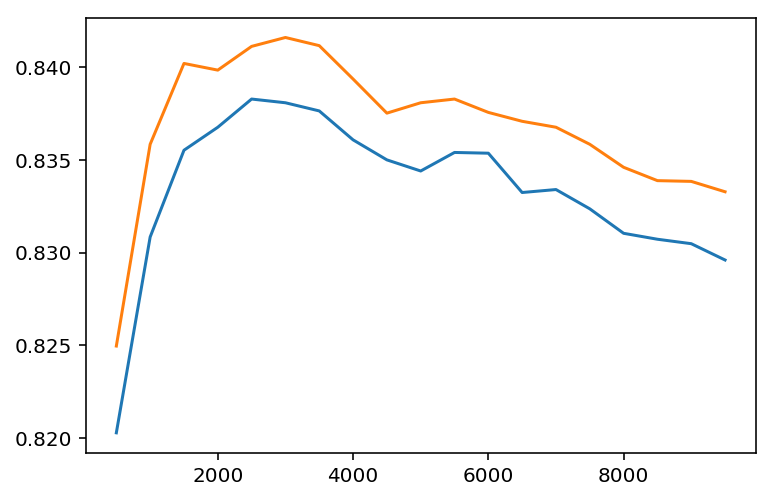

In [79]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

plt.plot(possible_n, cnt_accuracies, label='Word Count')
plt.plot(possible_n, tfidf_accuracies, label='Tf-idf')

# Save model

In [80]:
_, model, vec = train_with_n_topwords(3000, tfidf= True)

In [81]:
import pickle

with open('tf_vec.pkl', 'wb') as fp:
    pickle.dump(vec, fp)
with open('mnb_model.pkl','wb') as fp:
    pickle.dump(model, fp)